In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc

In [2]:
# load the clean & preprocessed dataset
churn_df = pd.read_csv('../data/churn_cleaned.csv')
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,NaN,NaN,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,NaN,NaN,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,NaN,NaN,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,NaN,NaN,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,NaN,NaN,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
# # define X and y variables
X = churn_df.drop(columns='churn', axis=1)
y = churn_df['churn']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # scale the train and test features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# display the shape of thr train and test sets
print("Shape of scaled X_train:", X_train.shape)
print("Shape of scaled X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of scaled X_train: (2666, 20)
Shape of scaled X_test: (667, 20)
Shape of y_train: (2666,)
Shape of y_test: (667,)


In [4]:
# instantiate a Decision Tree model
ran_model = RandomForestClassifier()

# fit the training data
ran_model.fit(X_train, y_train)

# model prediction on the test dataset
y_pred_ran = ran_model.predict(X_test)

# compute the accuracy and display classification report
ran_acc = accuracy_score(y_test, y_pred_ran)
print("Random Forest model accuracy:", ran_acc)

dec_report = classification_report(y_true=y_test, y_pred=y_pred_ran)
print(dec_report)

Random Forest model accuracy: 0.9175412293853074
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.93      0.50      0.65       101

    accuracy                           0.92       667
   macro avg       0.92      0.74      0.80       667
weighted avg       0.92      0.92      0.91       667



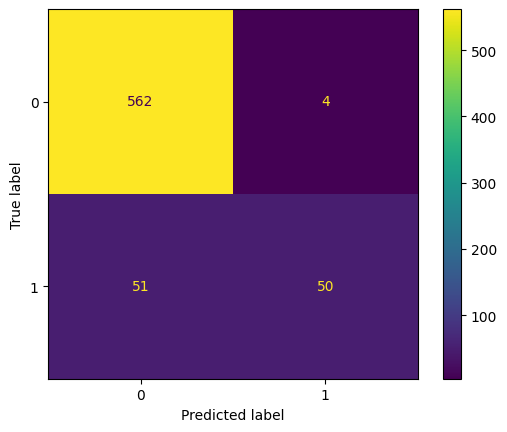

In [5]:
# compute the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_ran)
conf_matrix

# plot the confusion matrix
conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ran_model.classes_)
conf_disp.plot()

In [6]:
# hyperparameter tuning for the random forest model

# define the scope of the hyperparameters
param_grid_ran = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Instantiate the GridsearchCV function
grid_model_ran = GridSearchCV(ran_model, param_grid=param_grid_ran, cv=5, verbose=True, scoring='accuracy')

# fit the training data and obtain optimal hyperparameters
grid_model_ran.fit(X_train, y_train)
print("Optimal model hyperparameters:", grid_model_ran.best_params_)
print("Best model accuracy:", grid_model_ran.best_score_)
print("Best model estimators:", grid_model_ran.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Optimal model hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best model accuracy: 0.9216090112500087
Best model estimators: RandomForestClassifier(bootstrap=False, min_samples_leaf=2, n_estimators=200)


In [ ]:
# update the random forest model with the optimal hyperparameters
ran_model_tuned = RandomForestClassifier(
    bootstrap=False,
    min_samples_leaf=2,
    n_estimators=200,
    random_state=42
)

# fit the train data
ran_model_tuned.fit(X_train, y_train)

# predict on the test data and compute accuracy
y_pred_ran_tuned = ran_model_tuned.predict(X_test)
ran_acc_tuned = accuracy_score(y_test, y_pred_ran_tuned)
print("Tuned Random Forest model accuracy:", ran_acc_tuned)

# diplay the classification report
ran_tuned_report = classification_report(y_true=y_test, y_pred=y_pred_ran_tuned)
print(ran_tuned_report)

Tuned Random Forest model accuracy: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.86      0.50      0.64       101

    accuracy                           0.91       667
   macro avg       0.89      0.75      0.79       667
weighted avg       0.91      0.91      0.90       667

